## EigenModeSource

In [14]:
%reset -f 
%matplotlib inline

import meep as mp 
import matplotlib.pyplot as plt

dx = 100
dy = 100
area = mp.Vector3(dx, dy, 0)

#sources = [ mp.Source(mp.GaussianSource(frequency=0.1, width=5),
#                      component=mp.Ez, center=mp.Vector3(0,0,0) ) ]

#sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=0.1*fsrc) if compute_flux else mp.ContinuousSource(fsrc),
#                                  center=mp.Vector3(),
#                                  size=mp.Vector3(y=14),
#                                  direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
#                                  eig_kpoint=mp.Vector3(kx,0,0).rotate(mp.Vector3(0,0,1), rot_angle),
#                                  eig_band=bnum,
#                                  eig_parity=mp.EVEN_Y+mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
 #                                 eig_match_freq=True)]

fsrc = 0.15 # frequency of eigenmode or constant-amplitude source
kx = 0.4    # initial guess for wavevector in x-direction of eigenmode
bnum = 1    # band number of eigenmode

sources = [mp.EigenModeSource(src=mp.GaussianSource(.1, width=5),# if compute_flux else mp.ContinuousSource(fsrc),
                                  center=mp.Vector3(-25,0,0),
                                  size=mp.Vector3(y=25), #.rotate(mp.Vector3(0,0,1), rot_angle),
                                  #direction=mp.NO_DIRECTION,
                                  direction=mp.AUTOMATIC, # if rot_angle == 0 else mp.NO_DIRECTION,
                                  eig_kpoint=mp.Vector3(0.5, 0.0, 0),#.rotate(mp.Vector3(0,0,1), rot_angle),
                                  #eig_band=bnum,
                                  #eig_parity=mp.EVEN_Y, #+mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
                                  #eig_parity=mp.ODD_Z, # if rot_angle == 0 else mp.ODD_Z,
                                  #eig_match_freq=True, #False
                                  #eig_resolution = 4,
                                  )]
                     
sim = mp.Simulation(cell_size=area, boundary_layers=[mp.PML(5.0)],
                    geometry=[], sources=sources, resolution=2)

sim.reset_meep() 
sim.run(until=50)
data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ez)
data=data.transpose()

-----------
Initializing structure...
run 0 finished at t = 50.0 (200 timesteps)


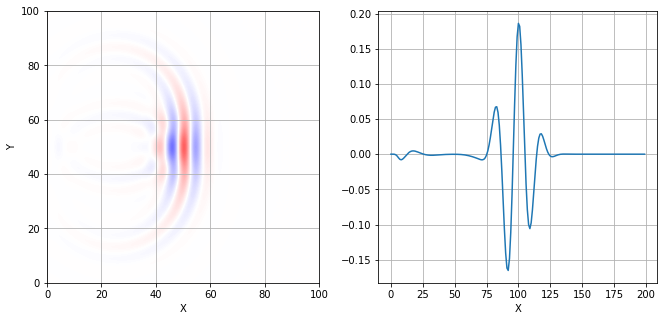

In [15]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
 
plt.imshow(data, interpolation='spline36', cmap='bwr', alpha=1.0, 
           extent=(0, dx, 0, dy), norm=plt.Normalize(-0.3, 0.3))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

ax = fig.add_subplot(122)
plt.plot(data[100,:])  #, label='Y = 50')
plt.xlabel('X')
plt.grid()
#plt.legend()
plt.show()